Few days ago I found [Quarto](https://quarto.org). I understood it is an authoring framework based on pandoc and that has full support of jupyter notebooks as input files. Since lot of work I carry on at the moment makes a heavy use of jupyter notebook I decided to try Quarto and use it for two main purposes:
the first is as a replacement of `jupyter nbconvert` that I have intensively used to convert notebooks to html pages. 

I saw that Quarto provides much more flexibility on the layout of the text, images and code, which was exactly what I was looking for.
The second way I intend to use Quarto is to publish the present content. At the time of writing, this post is written on an `index.ipynb` file in my local computer using Visual Studio code. I find extremely pleasant to write mixed content and have a tool that transforms it in a post page of a blog website.

I will showcase here all the features that I have personally found relevant for the posts I am going to write as well, hoping that this post serves as a quick reference (together with the [Quarto user guide](https://quarto.org/docs/guide/)).

## Code cells

Code cells are pretty straightforward: I just have to write code in a cell and it will be executed and the output eventually frozen by Quarto. I found the [freeze option](https://quarto.org/docs/projects/code-execution.html#freeze) particularly useful and I set it to `auto` at the time of writing. In this way, the notebooks will be re-rendered only if the source code changes.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

At the very base you can just enter some code and save it. If you are using `quarto preview` the jupyter notebook is executed when it saved (and not when a code cell is executed, but this depends on the saving options of jupyter).

For instance, we can write some code and let it display some output like this:

In [8]:
class TestClass:
    def __init__(self, params) -> None:
        self.attributes = params
    
    def increment(self, param: int) -> int:
        return param + 1

obj = TestClass('test')
obj.increment(10)

11

Sometimes a cell may contain lot of code that makes it difficult for the reader to keep track of the text. In this case folding the code is very helpful and only requires a special comment to be added at the beginning of the code cell:

```python
#| code-fold: true

class TestClass:
    def __init__(self, params) -> None:
        self.attributes = params
    
    def increment(self, param: int) -> int:
        return param + 1

obj = TestClass('test')
obj.increment(10)
```

Here below the result of the previous snippet of code:

In [9]:
#| code-fold: true

class TestClass:
    def __init__(self, params) -> None:
        self.attributes = params
    
    def increment(self, param: int) -> int:
        return param + 1

obj = TestClass('test')
obj.increment(10)

11

Note that the output of the cell is not folded. This is particularly useful if you have lot of code printing out a plot for example: the code will be folded but the plot will be visible anyway.

Some other time I wish to completely hide the code while keeping the output visible. In this case the option `echo: false` does the job:

```python
#| echo: false
plt.plot([1,2,3], [4,5,6], 'ro');
```

Here below the result of the previous snippet of code:

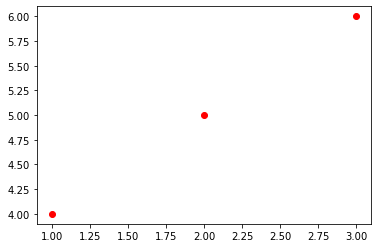

In [10]:
#| echo: false
plt.plot([1,2,3], [4,5,6], 'ro');

Code cells can be also assigned a file name. This is particularly helpful when there is a post that needs to tackle code among several files.
As an example you can have something like:

```python
#| filename: test.py

class A:
    pass
```

And this would be rendered to:

In [ ]:
#| filename: test.py

class A:
    pass

## Controlling figures layout

I find particularly useful the way Quarto helps treating outputs for code cells, especially laying out figures resulting from a code output. Often times I have big plots that I would like to take all the available horizontal space in the page. In this case I can use `#| column: screen` together with `#| fig-align: center` on the code cell

```python
#| column: screen
#| fig-align: center
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.plot(range(10), [1,2,3,2,1,2,2,31,1,2])
```

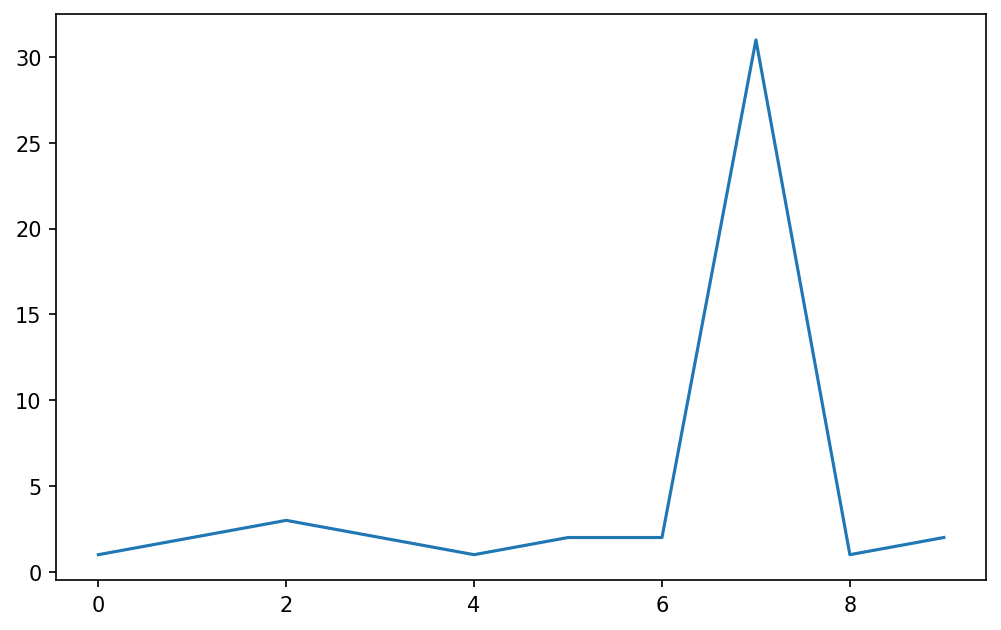

In [22]:
#| column: screen
#| fig-align: center
#| echo: false
fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.plot(range(10), [1,2,3,2,1,2,2,31,1,2])

There is also support for custom layouts when multiple plots are produced. I typically use matplotlib APIs to lay out multiple plots but this features could be useful for images in general and sometimes with libraries where the layout support for subplots is not straightforward. As an example see this snippet:

```python
#| layout-ncol: 2

fig, ax = plt.subplots()
ax.plot([1,2,3,4], [4,3,2,3], 'ro-')

fig2, ax2 = plt.subplots()
ax2.plot([1,2,3,4], [4,3,1,32], 'b*--')
```

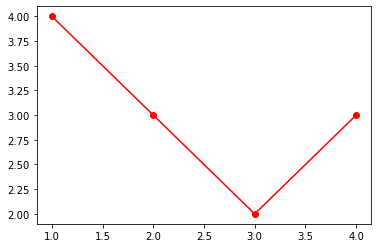

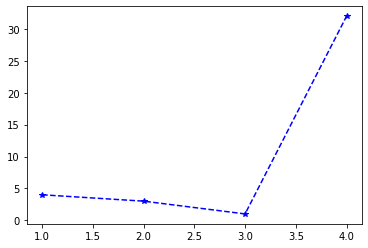

In [23]:
#| layout-ncol: 2
#| echo: false

fig, ax = plt.subplots()
ax.plot([1,2,3,4], [4,3,2,3], 'ro-')

fig2, ax2 = plt.subplots()
ax2.plot([1,2,3,4], [4,3,1,32], 'b*--')

## Conclusions

There are several more features that I think I will be using throughout my journey on this blog. There are also some features related to publications that I want to explore as I would like to understand if I can have some publications ready LaTeX documents from jupyter notebooks

I found Quarto really easy to use and [the documentation](https://quarto.org/docs/guide/) is fairly straightforward to follow. I hope to post more interesting findings and customization as I will use it :)